In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('C:\\Users\\satur\\IH-Labs\\7_01_7_02_Data_Cleaning_and_Feature_Selection_Review\\learningSet.csv')

C:\Users\satur\AppData\Local\Temp\ipykernel_12736\605851087.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('C:\\Users\\satur\\IH-Labs\\7_01_7_02_Data_Cleaning_and_Feature_Selection_Review\\learningSet.csv')


In [3]:
print(data.shape)
data.head()

(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,,,,XXXX,T2,36,60.0,,,,,,,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0,39,34,18,10,2,1,,,,5.0,,,,,,,,,,,,,,,,,,,,,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9604.

In [4]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.000000
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
476,MDMAUD_R,0.000000
477,MDMAUD_F,0.000000
478,MDMAUD_A,0.000000
479,CLUSTER2,0.001383


In [5]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
16,AGE,0.248030
23,NUMCHLD,0.870184
24,INCOME,0.223096
26,WEALTH1,0.468830
28,MBCRAFT,0.553955
...,...,...
455,RAMNT_24,0.814090
466,NEXTDATE,0.104526
467,TIMELAG,0.104526
479,CLUSTER2,0.001383


In [6]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 72, dtype: object

In [7]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [8]:
cols = ['WEALTH1', 'WEALTH2']
for item in cols:
        drop_columns_list.remove(item)

In [9]:
data.drop(drop_columns_list, axis = 1, inplace = True) 

In [10]:
data['MAILCODE'].value_counts()


     94013
B     1399
Name: MAILCODE, dtype: int64

In [11]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))

In [12]:
data = data.apply(lambda x: x.replace(" ", np.NaN))

In [13]:
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,INCOME,GENDER,WEALTH1,HIT,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,A,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,A,NaN,5202,0,NaN,NaN,NaN,NaN,XXXX,S1,14,46.0,E,H,NaN,NaN,NaN,M,6.0,M,9.0,16,3,0,15,55,11,6,2,1,NaN,NaN,NaN,9.0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,

In [14]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

,column_name,nulls_percentage
0,ODATEDW,0.000000
1,OSOURCE,0.009726
2,TCODE,0.000000
3,STATE,0.000000
4,ZIP,0.000000
...,...,...
406,MDMAUD_R,0.000000
407,MDMAUD_F,0.000000
408,MDMAUD_A,0.000000
409,CLUSTER2,0.001383


In [15]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
1,OSOURCE,0.009726
6,PVASTATE,0.984719
8,NOEXCH,0.000073
9,RECINHSE,0.929747
10,RECP3,0.978860
...,...,...
380,RFA_24,0.387509
396,NEXTDATE,0.104526
397,TIMELAG,0.104526
409,CLUSTER2,0.001383


In [16]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

6      PVASTATE
9      RECINHSE
10        RECP3
11      RECPGVG
12     RECSWEEP
17      AGEFLAG
19      CHILD03
20      CHILD07
21      CHILD12
22      CHILD18
25      WEALTH1
35        SOLP3
36        SOLIH
37        MAJOR
38      WEALTH2
39      GEOCODE
40     COLLECT1
41     VETERANS
42        BIBLE
43        CATLG
44        HOMEE
45         PETS
46       CDPLAY
47       STEREO
48     PCOWNERS
49        PHOTO
50       CRAFTS
51       FISHER
52     GARDENIN
53        BOATS
54       WALKER
55     KIDSTUFF
56        CARDS
57       PLATES
58      LIFESRC
59     PEPSTRFL
361       RFA_5
366      RFA_10
369      RFA_13
371      RFA_15
373      RFA_17
375      RFA_19
376      RFA_20
377      RFA_21
378      RFA_22
379      RFA_23
380      RFA_24
Name: column_name, dtype: object

In [17]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['PVASTATE', 'RECINHSE', 'RECP3', 'RECPGVG', 'RECSWEEP', 'AGEFLAG', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'WEALTH1', 'SOLP3', 'SOLIH', 'MAJOR', 'WEALTH2', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_5', 'RFA_10', 'RFA_13', 'RFA_15', 'RFA_17', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


In [18]:
cols = ['WEALTH1', 'WEALTH2', 'VETERANS', 'SOLIH']
for item in cols:
    drop_columns_list.remove(item)

In [19]:
data.drop(drop_columns_list, axis = 1, inplace = True)

In [20]:
data.shape

(95412, 368)

In [22]:
Y = data[['TARGET_B', 'TARGET_D']]
Y.head()

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [23]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

In [24]:
numerical.shape

(95412, 335)

In [25]:
categorical = data.select_dtypes(object)
categorical.head()

,OSOURCE,STATE,ZIP,MAILCODE,NOEXCH,MDMAUD,DOMAIN,CLUSTER,HOMEOWNR,GENDER,DATASRCE,SOLIH,VETERANS,RFA_2,RFA_3,RFA_4,RFA_6,RFA_7,RFA_8,RFA_9,RFA_11,RFA_12,RFA_14,RFA_16,RFA_18,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,A,0,XXXX,T2,36,NaN,F,NaN,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,A,0,XXXX,S1,14,H,M,3,NaN,NaN,L2G,A2G,A2G,A2G,A1E,A1E,A1E,A1E,A1E,NaN,L1E,NaN,L,G,X,X,X,A
2,AMH,NC,27017,A,0,XXXX,R2,43,U,M,3,NaN,NaN,L4E,S4E,S4E,S4E,S4F,S4F,S4F,S4F,S4F,S4F,S4F,S4D,L,E,X,X,X,C
3,BRY,CA,95953,A,0,XXXX,R2,44,U,F,3,NaN,NaN,L4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S4E,S2D,L,E,X,X,X,C
4,NaN,FL,33176,A,0,XXXX,S2,16,H,F,3,12,NaN,L2F,A2F,A2F,A1D,I2D,A1E,A1E,A1E,A1E,L3D,L3D,A2D,L,F,X,X,X,A


In [26]:
categorical.shape

(95412, 31)

In [27]:
categorical.isna().sum()/len(categorical)

OSOURCE     0.009726
STATE       0.000000
ZIP         0.000000
MAILCODE    0.000000
NOEXCH      0.000073
MDMAUD      0.000000
DOMAIN      0.024274
CLUSTER     0.024274
HOMEOWNR    0.232969
GENDER      0.030992
DATASRCE    0.223033
SOLIH       0.935019
VETERANS    0.890727
RFA_2       0.000000
RFA_3       0.020438
RFA_4       0.024232
RFA_6       0.037280
RFA_7       0.093007
RFA_8       0.036798
RFA_9       0.117857
RFA_11      0.109232
RFA_12      0.093521
RFA_14      0.197742
RFA_16      0.213988
RFA_18      0.222855
RFA_2R      0.000000
RFA_2A      0.000000
MDMAUD_R    0.000000
MDMAUD_F    0.000000
MDMAUD_A    0.000000
GEOCODE2    0.003343
dtype: float64

In [28]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [29]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

In [30]:
drop_list = []
cols = ['OSOURCE', 'ZIP']
for col in cols:
    drop_list.append(col)

In [31]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df.head(60)
nulls_percent_df.shape

(368, 2)

In [32]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

,column_name,nulls_percentage
1,OSOURCE,0.009726
7,NOEXCH,0.000073
9,DOMAIN,0.024274
10,CLUSTER,0.024274
11,AGE,0.248030
12,HOMEOWNR,0.232969
13,INCOME,0.223096
14,GENDER,0.030992
15,WEALTH1,0.468830
17,DATASRCE,0.223033


In [33]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.85]
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['SOLIH', 'VETERANS']


In [34]:
categorical.columns

Index(['OSOURCE', 'STATE', 'ZIP', 'MAILCODE', 'NOEXCH', 'MDMAUD', 'DOMAIN',
       'CLUSTER', 'HOMEOWNR', 'GENDER', 'DATASRCE', 'SOLIH', 'VETERANS',
       'RFA_2', 'RFA_3', 'RFA_4', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_11',
       'RFA_12', 'RFA_14', 'RFA_16', 'RFA_18', 'RFA_2R', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')

In [35]:
cols = ['VETERANS', 'SOLIH']
for item in cols:
     drop_list.append(item)

In [36]:
categorical['GENDER'] = np.where(categorical['GENDER'].isin(['U', 'J', 'C', 'A']), 'other', categorical['GENDER'])

In [37]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [38]:
print(categorical['GENDER'].value_counts(dropna=False))

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64


In [39]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557


In [40]:
categorical['DOMAIN'].value_counts(dropna=False)

R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: DOMAIN, dtype: int64

In [41]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [42]:
categorical = categorical.drop(columns=['DOMAIN'])

In [43]:
categorical['MAILCODE'].value_counts()/len(categorical)

A    0.985337
B    0.014663
Name: MAILCODE, dtype: float64

In [44]:
categorical['NOEXCH'].value_counts()/len(categorical)

0    0.641460
0    0.355113
1    0.002044
1    0.000943
X    0.000367
Name: NOEXCH, dtype: float64

In [45]:
categorical['MDMAUD'].value_counts()/len(categorical)

XXXX    0.996919
C1CM    0.000681
L1CM    0.000461
I1CM    0.000388
D2CM    0.000293
C2CM    0.000252
D1CM    0.000210
L2CM    0.000157
L1LM    0.000084
C1LM    0.000084
I2CM    0.000073
D5CM    0.000052
D5MM    0.000052
D2MM    0.000042
C5CM    0.000031
C2MM    0.000031
C2LM    0.000031
D5TM    0.000031
I1LM    0.000031
I5CM    0.000010
C1MM    0.000010
I5MM    0.000010
C5MM    0.000010
I2MM    0.000010
L1MM    0.000010
L2LM    0.000010
C5TM    0.000010
L2TM    0.000010
Name: MDMAUD, dtype: float64

In [46]:
lst = ['MAILCODE', 'NOEXCH', 'MDMAUD']

In [47]:
for i in lst:
    drop_list.append(i)

In [48]:
drop_list

['OSOURCE', 'ZIP', 'VETERANS', 'SOLIH', 'MAILCODE', 'NOEXCH', 'MDMAUD']

In [49]:
categorical['MDMAUD_R'].value_counts()

X    95118
C      109
L       70
D       65
I       50
Name: MDMAUD_R, dtype: int64

In [50]:
categorical['MDMAUD_F'].value_counts()

X    95118
1      187
2       87
5       20
Name: MDMAUD_F, dtype: int64

In [51]:
categorical['MDMAUD_A'].value_counts()

X    95118
C      249
L       23
M       17
T        5
Name: MDMAUD_A, dtype: int64

In [52]:
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

In [53]:
categorical['CLUSTER'].value_counts(dropna=False)

40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: CLUSTER, dtype: int64

In [54]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')

In [55]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H      52354
NaN    22228
U      20830
Name: HOMEOWNR, dtype: int64

In [56]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U')

In [57]:
categorical['GENDER'].value_counts(dropna=False)

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [58]:
categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [59]:
categorical['DATASRCE'].value_counts(dropna = False)

3      43549
2      23455
NaN    21280
1       7128
Name: DATASRCE, dtype: int64

In [60]:
categorical['DATASRCE'].fillna(3, inplace = True)

In [61]:

categorical['GEOCODE2'].value_counts(dropna = False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [62]:
categorical['GEOCODE2'].fillna('A', inplace = True)

In [63]:
categorical['RFA_2'].value_counts()

L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
Name: RFA_2, dtype: int64

In [64]:
# We will keep the column RFA_2X. We will delete rest of the columns 

for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)  

In [65]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['OSOURCE',
 'ZIP',
 'VETERANS',
 'SOLIH',
 'MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [66]:
categorical = categorical.drop(columns=drop_list)
categorical.head()

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2
0,IL,36,U,F,3,L,E,C
1,CA,14,H,M,3,L,G,A
2,NC,43,U,M,3,L,E,C
3,CA,44,U,F,3,L,E,C
4,FL,16,H,F,3,L,F,A


In [67]:
categorical.isna().sum()

STATE       0
CLUSTER     0
HOMEOWNR    0
GENDER      0
DATASRCE    0
RFA_2R      0
RFA_2A      0
GEOCODE2    0
dtype: int64

##### numerical columns

In [68]:
numerical.head()

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_11,ADATE_12,ADATE_14,ADATE_16,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9508.0,9506.0,9503.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,9706,9606.0,9604.0,9603.0,9602.0,9601.0,9511.0,9510.0,9509.0,NaN,9503.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,

In [69]:
numerical.shape

(95412, 335)

In [70]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
3,AGE,23665
4,INCOME,21286
5,WEALTH1,44732
14,WEALTH2,43823
135,MSA,132
136,ADI,132
137,DMA,132
302,ADATE_3,1950
303,ADATE_4,2191
304,ADATE_6,3557


In [71]:
adate = []

for col_name in numerical.columns:
    if "DATE" in col_name:
        adate.append(col_name)  

In [72]:
numerical.drop(adate, axis = 1, inplace = True)

In [73]:
numerical.head()

,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,3712,60.0,NaN,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4.0,7.741935,95515,0,4,39.0
1,1,5202,46.0,6.0,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18.0,15.666667,148535,0,2,1.0
2,1,0,NaN,3.0,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


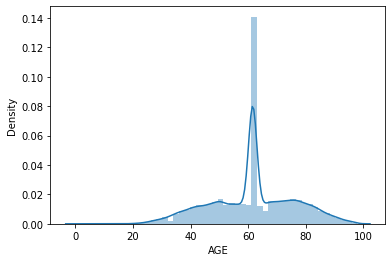

In [74]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))
sns.distplot(numerical['AGE'])
plt.show()
#probably would be a bit better to use a predictive method here but this works

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


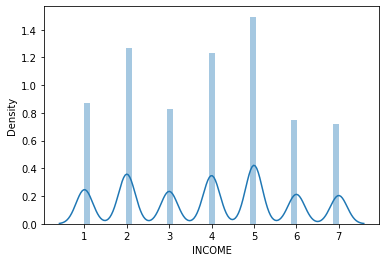

In [75]:
#sns.distplot(numerical['INCOME'])  # this will not work as there are NaNs in the column
sns.distplot(numerical[numerical['INCOME'].isna()==False]['INCOME']) 
plt.show()

In [76]:
# looks like the variable is actually categorical. We can verify it by using value_counts()
print(numerical['INCOME'].value_counts())
numerical['INCOME'] = numerical['INCOME'].astype('object')

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64


In [77]:
numerical['INCOME'] = numerical['INCOME'].fillna('5.0') # Replacing the null values with the most represented categoty

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


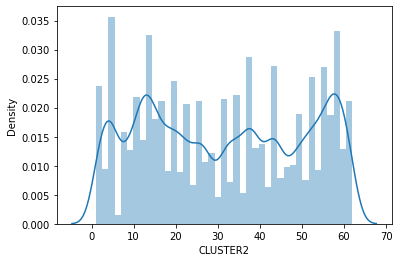

In [78]:
sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [79]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


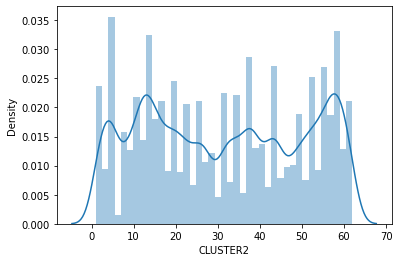

In [80]:
sns.distplot(numerical['CLUSTER2'])
plt.show()

In [81]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
4,WEALTH1,44732
13,WEALTH2,43823
134,MSA,132
135,ADI,132
136,DMA,132
310,TIMELAG,9973


In [82]:
numerical['WEALTH2'].value_counts(dropna = False)

NaN    43823
9.0     6523
8.0     5975
7.0     5684
6.0     5497
5.0     5351
4.0     5074
3.0     5046
2.0     4971
1.0     4191
0.0     3277
Name: WEALTH2, dtype: int64

In [83]:
numerical['WEALTH2'] = numerical['WEALTH2'].fillna(np.ceil(np.mean(numerical['WEALTH2'])))

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


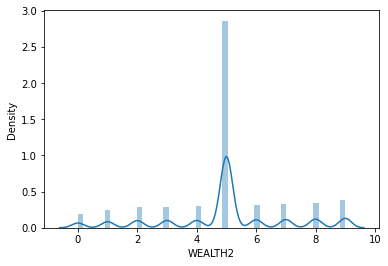

In [84]:
sns.distplot(numerical['WEALTH2'])
plt.show()

In [85]:
numerical['TIMELAG'].value_counts(dropna = False)

NaN       9973
5.0       8584
4.0       8490
3.0       8485
6.0       6648
          ... 
89.0         1
1044.0       1
53.0         1
442.0        1
1088.0       1
Name: TIMELAG, Length: 69, dtype: int64

In [86]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(np.ceil(np.mean(numerical['TIMELAG'])))

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


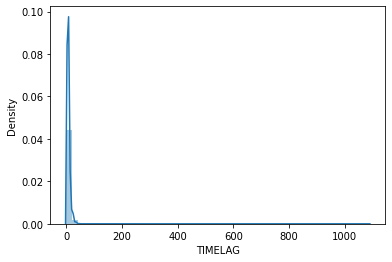

In [87]:
sns.distplot(numerical['TIMELAG'])
plt.show()

In [88]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls
4,WEALTH1,44732
134,MSA,132
135,ADI,132
136,DMA,132


C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


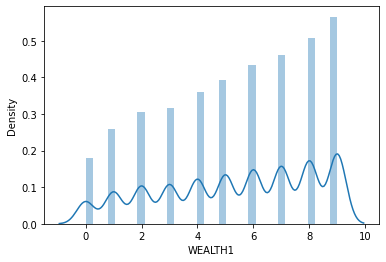

In [89]:
sns.distplot(numerical[numerical['WEALTH1'].isna()==False]['WEALTH1'])
plt.show()

In [90]:
numerical['WEALTH1'].value_counts(dropna = False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [91]:
numerical['WEALTH1'].fillna(9, inplace = True)

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


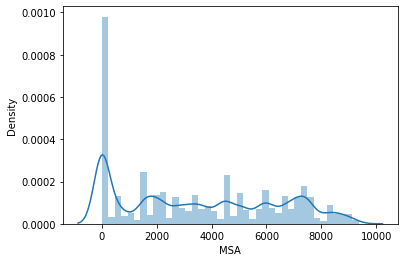

In [92]:
sns.distplot(numerical[numerical['MSA'].isna()==False]['MSA'])
plt.show()

In [93]:
numerical['MSA'].value_counts(dropna = False)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64

In [94]:
numerical['MSA'] = numerical['MSA'].fillna(np.ceil(np.mean(numerical['MSA'])))

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


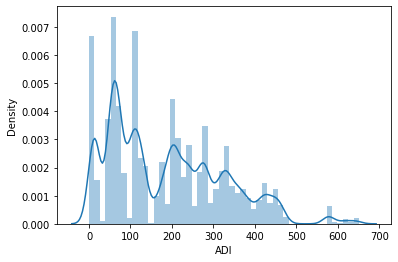

In [95]:
sns.distplot(numerical[numerical['ADI'].isna()==False]['ADI'])
plt.show()

In [96]:
numerical['ADI'].value_counts(dropna = False)

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64

In [97]:
numerical['ADI'] = numerical['ADI'].fillna(np.ceil(np.mean(numerical['ADI'])))

C:\Users\satur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


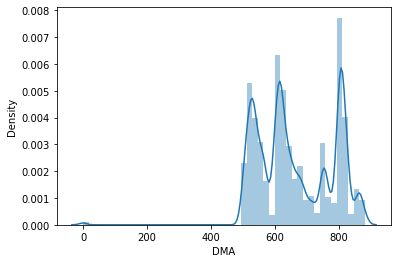

In [98]:
sns.distplot(numerical[numerical['DMA'].isna()==False]['DMA'])
plt.show()

In [99]:
numerical['DMA'].value_counts(dropna = False)

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64

In [100]:
numerical['DMA'].fillna(803, inplace = True)

In [101]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

,column_name,nulls


In [102]:
numerical.to_csv('numerical7_02.csv')
categorical.to_csv('categorical7_02.csv')

In [103]:
Y.to_csv('target7_02.csv')

In [ ]:
# alternative:
# numerical.to_pickle('numerical7_02.p')
# categorical.to_pickle('categorical7_02.p')
# Y.to_pickle('target7.02.p')